# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM ZF1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [22]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression

# print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### 2.1. Train Data

In [148]:
df1 = pd.read_csv("df_train.csv")
print(f"There are {df1.shape[0]} rows and {df1.shape[1]} columns")
df1.head(2)
print('', end="\n\n")

# Remove unnecessary column(s)

col_except1 = "Unnamed: 0"
df_train = df1.loc[:, df1.columns != col_except]
print(f"There are {df_train.shape[0]} rows and {df_train.shape[1]} columns")
df_train.head(10).T
print('', end="\n\n")

There are 8763 rows and 49 columns


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667




There are 8763 rows and 48 columns


,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2. Test Data

In [57]:
df2 = pd.read_csv("df_test.csv")
print(f"There are {df2.shape[0]} rows and {df2.shape[1]} columns")
df2.head(2)
print('', end="\n\n")

# Remove unnecessary column(s)

col_except2 = "Unnamed: 0"
df_test = df2.loc[:, df2.columns != col_except2]
print(f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns")
df_test.head(2)
print('', end="\n\n")

There are 2920 rows and 48 columns


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15




There are 2920 rows and 47 columns


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1. Look at data statistics

#### 3.1.0. Define functions

In [138]:
# descride variable including mode and median

def describe(df):
    d = {0:[df.mean(), df.median(), df.mode()[0]]}
    dat = pd.DataFrame(data=d).rename(index={0: "Mean", 1: "Median", 2: "Mode"})
    return pd.concat([df.describe(), dat])

#### 3.1.1. Train data

In [190]:
# Data comprehension

print(f"There are {df_train.isnull().sum().sum()} null values")
df_train.isnull().sum()
print('', end="\n\n")

describe(df_train["Valencia_pressure"])

# Deal with null containing column(s)

df_train_clean = df_train.copy()
df_train_clean["Valencia_pressure"] = df_train_clean["Valencia_pressure"].fillna(df_train_clean["Valencia_pressure"].mode()[0])
print('', end="\n\n")

print(f"There are {df_train_clean.isnull().sum().sum()} null values")
df_train_clean.isnull().sum()
print('', end="\n\n")

describe(df_train_clean["Valencia_pressure"])
print('', end="\n\n")

# Sort columns to show each city variable together

df_train_clean_sort = df_train_clean[sorted(df_train_clean)]
df_train_clean_sort.info()
print(f"There are 5 cities; Barcelona, Bilbao, Madrid, Seville, Valencia", end="\n"
     "There are 5 variables reoccuring across all cities; Pressure, temp, temp_max, temp_min, wind_speed")
print('', end="\n\n\n")

# Convert object dtypes to float

# date
df_train_clean_sort["time"] = pd.to_datetime(df_train_clean_sort["time"])
print("Time column has been converted to")
print(df_train_clean_sort["time"].dtypes)
print('', end="\n\n")


print(f"Univariable non-Graphical Analysis")
# df_train_sort.describe().T

There are 2068 null values


time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

,0
count,6695.000000
mean,1012.051407
std,9.506214
min,972.666667
25%,1010.333333
50%,1015.000000
75%,1018.000000
max,1021.666667
Mean,1012.051407
Median,1015.000000




There are 0 null values


time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

,0
count,8763.000000
mean,1013.455228
std,8.684485
min,972.666667
25%,1012.666667
50%,1017.000000
75%,1018.000000
max,1021.666667
Mean,1013.455228
Median,1017.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barcelona_pressure    8763 non-null   float64
 1   Barcelona_rain_1h     8763 non-null   float64
 2   Barcelona_rain_3h     8763 non-null   float64
 3   Barcelona_temp        8763 non-null   float64
 4   Barcelona_temp_max    8763 non-null   float64
 5   Barcelona_temp_min    8763 non-null   float64
 6   Barcelona_weather_id  8763 non-null   float64
 7   Barcelona_wind_deg    8763 non-null   float64
 8   Barcelona_wind_speed  8763 non-null   float64
 9   Bilbao_clouds_all     8763 non-null   float64
 10  Bilbao_pressure       8763 non-null   float64
 11  Bilbao_rain_1h        8763 non-null   float64
 12  Bilbao_snow_3h        8763 non-null   float64
 13  Bilbao_temp           8763 non-null   float64
 14  Bilbao_temp_max       8763 non-null   float64
 15  Bilbao_temp_min    

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['mpg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

#### 3.1.2. Test data

In [58]:
# Data comprehension

df_test_sort = df_test[sorted(df_test)]
df_test_sort.info()
print(f"There are 5 cities; Barcelona, Bilbao, Madrid, Seville, Valencia", end="\n"
     "There are 5 variables reoccuring across all cities; Pressure, temp, temp_max, temp_min, wind_speed")
# Same as train data
print('', end="\n\n\n")

print(f"There are {df_test.isnull().sum().sum()} null values")
df_test.isnull().sum()
print('', end="\n\n")

print(f"Univariable non-Graphical Analysis")
df_test_sort.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barcelona_pressure    2920 non-null   float64
 1   Barcelona_rain_1h     2920 non-null   float64
 2   Barcelona_rain_3h     2920 non-null   float64
 3   Barcelona_temp        2920 non-null   float64
 4   Barcelona_temp_max    2920 non-null   float64
 5   Barcelona_temp_min    2920 non-null   float64
 6   Barcelona_weather_id  2920 non-null   float64
 7   Barcelona_wind_deg    2920 non-null   float64
 8   Barcelona_wind_speed  2920 non-null   float64
 9   Bilbao_clouds_all     2920 non-null   float64
 10  Bilbao_pressure       2920 non-null   float64
 11  Bilbao_rain_1h        2920 non-null   float64
 12  Bilbao_snow_3h        2920 non-null   int64  
 13  Bilbao_temp           2920 non-null   float64
 14  Bilbao_temp_max       2920 non-null   float64
 15  Bilbao_temp_min      

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   



Univariable non-Graphical Analysis


,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,2920.0,1015.317123,7.021445,988.333333,1012.000000,1016.000000,1019.333333,1037.000000
Barcelona_rain_1h,2920.0,0.047397,0.162474,0.000000,0.000000,0.000000,0.000000,2.300000
Barcelona_rain_3h,2920.0,0.000006,0.000217,0.000000,0.000000,0.000000,0.000000,0.009667
Barcelona_temp,2920.0,289.911289,7.119411,272.650000,284.307500,289.483333,295.816667,308.150000
Barcelona_temp_max,2920.0,290.695462,7.113599,273.816667,284.816667,290.150000,296.483333,309.483333
Barcelona_temp_min,2920.0,289.124971,7.168049,271.483333,283.483333,288.816667,295.150000,306.816667
Barcelona_weather_id,2920.0,760.473307,98.009846,207.333333,800.000000,800.000000,801.000000,804.000000
Barcelona_wind_deg,2920.0,178.979452,86.976503,0.000000,113.333333,176.666667,253.333333,343.333333
Barcelona_wind_speed,2920.0,2.518094,1.625507,0.000000,1.333333,2.000000,3.666667,12.666667
Bilbao_clouds_all,2920.0,43.355422,30.486298,0.000000,13.333333,45.000000,75.000000,97.333333


### 3.2. Plot relevant feature interactions

In [59]:
# Checking for Linearity



In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

### Checking for Linearity

The first thing we need to check is the mathematical relationship between each predictor variable and the response variable. What we are looking for here is known as linearity. A linear relationship means that a change in the response *Y* due to a one-unit change in the predictor $X_j$ is constant, regardless of the value of $X_j$.

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

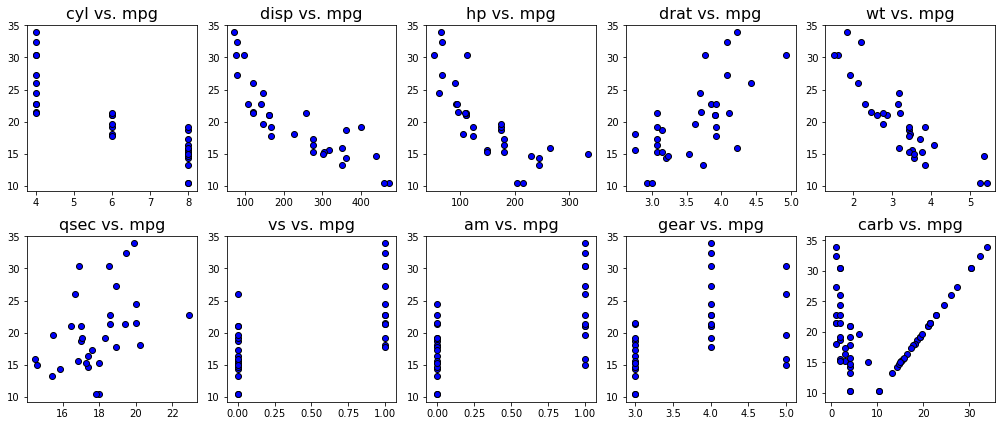

In [15]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['mpg'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

It appears at least half of the variables, including all five on the top row, have an approximately linear relationship. Here a trend between each of `cyl, disp, hp, drat, wt`, and `qsec` and `mpg` seems to exist. However, `carb` and `gear` exhibit no linearity with `mpg`.

Based on these observations, it appears there is sufficient linearity present to proceed with applying a linear regression model. Let's continue.

We'll create a copy of the dataset so that we can play with and process it using `statsmodels.OLS()`, which is the least squares regression module within the `statsmodels` library. We'll be carrying out our regression with this module.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic